# Backpropagation with momentum
From: https://rolisz.ro/2013/04/18/neural-networks-in-python/

## Loading the packages

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## The Dataset
The following script allows you to create a 2D dataset by using the mouse. The left click adds points belonging to class A (blue), and the right click adds points belonging to class B (red). You can create as many points as you desire. The final dataset will contain hence three values per point: x coordinate (-1 ≤ x ≤ 1), y coordinate (-1 ≤ y ≤ 1) and the class ∈ {1,-1}.

<IPython.core.display.Javascript object>


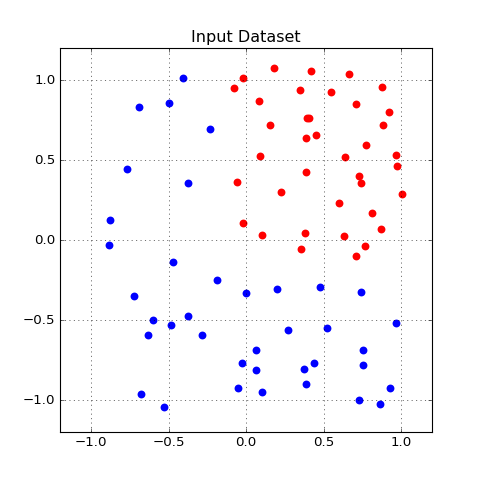

In [4]:
%matplotlib notebook

fig = pl.figure(figsize=(6,6))
pl.title("Input Dataset")
pl.xlim((-1.2,1.2))
pl.ylim((-1.2,1.2))

dataset = []

def onclick(event):
    global dataset
    cx = event.xdata
    cy = event.ydata
    co = event.button
    dataset.append((cx, cy, co-2))

    pl.scatter(cx, cy, c=(['b', 'r'])[co > 2], s=50, lw=0)
    pl.grid(True)


cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [5]:
fig.canvas.mpl_disconnect(onclick)

## Show the dataset

In [6]:
dataset = np.array(dataset)
dataset

array([[ -2.32862903e-01,   6.93261719e-01,  -1.00000000e+00],
       [ -3.74798387e-01,   3.55761719e-01,  -1.00000000e+00],
       [ -8.84475806e-01,  -3.17382812e-02,  -1.00000000e+00],
       [ -8.78024194e-01,   1.24511719e-01,  -1.00000000e+00],
       [ -6.90927419e-01,   8.30761719e-01,  -1.00000000e+00],
       [ -4.07056452e-01,   1.01201172e+00,  -1.00000000e+00],
       [ -4.97379032e-01,   8.55761719e-01,  -1.00000000e+00],
       [ -7.68346774e-01,   4.43261719e-01,  -1.00000000e+00],
       [ -4.71572581e-01,  -1.37988281e-01,  -1.00000000e+00],
       [ -6.32862903e-01,  -5.94238281e-01,  -1.00000000e+00],
       [ -6.78024194e-01,  -9.62988281e-01,  -1.00000000e+00],
       [ -5.29637097e-01,  -1.04423828e+00,  -1.00000000e+00],
       [ -5.22177419e-02,  -9.25488281e-01,  -1.00000000e+00],
       [  6.39112903e-02,  -8.12988281e-01,  -1.00000000e+00],
       [ -2.64112903e-02,  -7.69238281e-01,  -1.00000000e+00],
       [ -2.84475806e-01,  -5.94238281e-01,  -1.0000000

## The MLP
The class presented here was adapted from the code found at: https://rolisz.ro/2013/04/18/neural-networks-in-python/

The class implements a MLP with a fully configurable number of layers and neurons. It adapts its weights using the backpropagation algorithm in an online manner.

In [7]:
import mlp_backprop_momentum as mlp
%matplotlib inline

## Learning
Let use the MLP class to solve a classification problem

### Create the MLP

In [9]:
input_data = dataset[:,0:2]
output_data = dataset[:,2]
nn = mlp.MLP([2,2,1], 'tanh')
# 2 inputs
# 2 hidden nodes
# 1 output

### Use backpropagation to find the network parameters

In [14]:
MSE = nn.fit((input_data, output_data), learning_rate=0.001, momentum=0.5, epochs=1000)

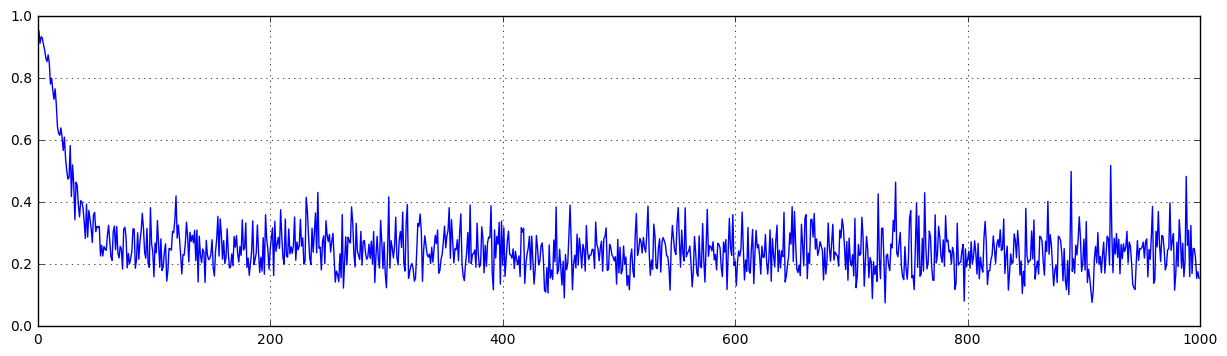

In [15]:
# plot the error through the iterations of the algorithm
pl.figure(figsize=(15,4))
pl.plot(MSE)
pl.grid()

## Testing
Now, let's use the trained network to predict the classes in the dataset. This section shows three different manners of showing the outputs of the network, and how to compare its output with the targets to evaluate the performance of the classification.

In [16]:
output = np.zeros(dataset.shape[0])
for i in np.arange(dataset.shape[0]):
    output[i] = nn.predict(input_data[i,:])

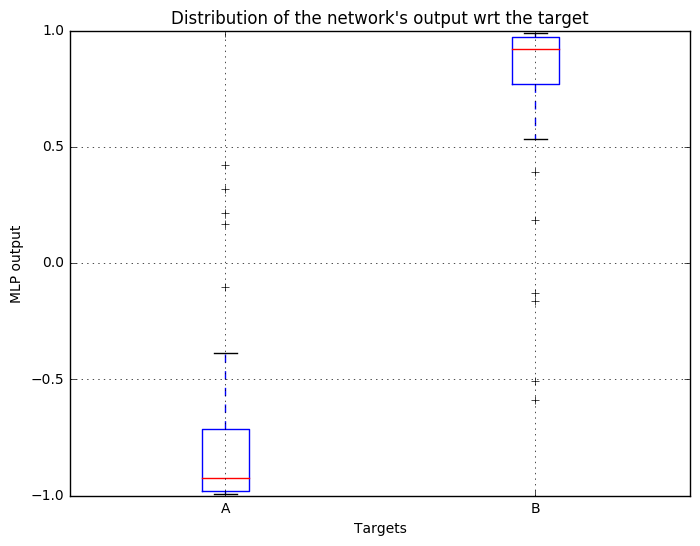

In [17]:
pl.figure(figsize=(8,6))
pl.boxplot([output[output_data==-1.0], output[output_data==1.0]])
pl.xticks([1, 2], ['A', 'B'])
pl.xlabel('Targets')
pl.ylabel('MLP output')
pl.title("Distribution of the network's output wrt the target")
pl.grid()

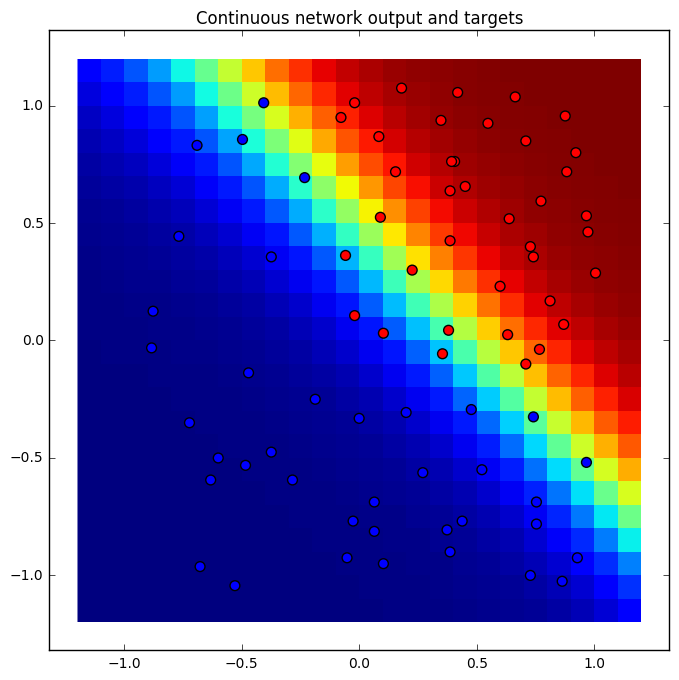

In [20]:
input_x = np.arange(-1.2, 1.2, 0.1)
input_y = np.arange(-1.2, 1.2, 0.1)
input_x_matrix, input_y_matrix = np.meshgrid(input_x, input_y)
inputs_xy = np.concatenate((input_x_matrix.flatten()[:,np.newaxis], input_y_matrix.flatten()[:,np.newaxis]), axis=1)

output_values = np.zeros(inputs_xy.shape[0])
for i in np.arange(inputs_xy.shape[0]):
    output_values[i] = nn.predict(inputs_xy[i,:])
output_matrix = np.reshape(output_values, input_x_matrix.shape)

pl.figure(figsize=(8,8))
pl.imshow(np.flipud(output_matrix), interpolation='None', extent=(-1.2,1.2,-1.2,1.2))
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output_data], s=50)
pl.title('Continuous network output and targets')

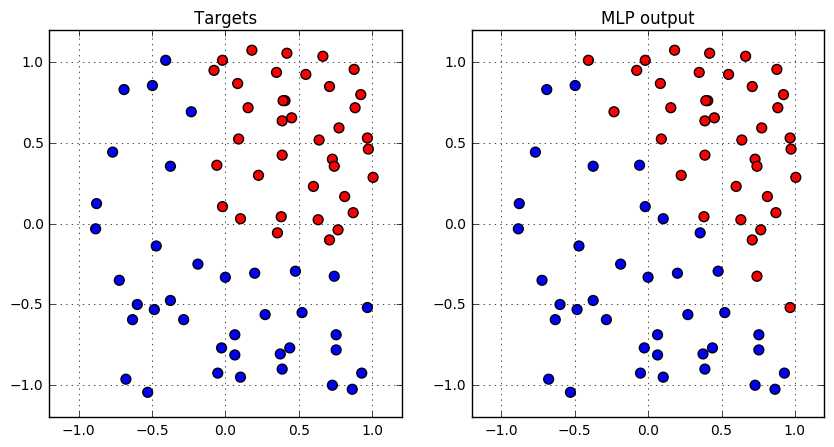

In [21]:
pl.figure(figsize=(10,5))
pl.subplot(1,2,1)
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output_data], s=50)
pl.xlim(-1.2, 1.2)
pl.ylim(-1.2, 1.2)
pl.grid()
pl.title('Targets')
pl.subplot(1,2,2)
pl.scatter(input_data[:,0], input_data[:,1], c=[(['b', 'r'])[d>0] for d in output], s=50)
pl.xlim(-1.2, 1.2)
pl.ylim(-1.2, 1.2)
pl.grid()
pl.title('MLP output')